In [1]:
# Import Libraries & Load Data

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Define the path to the excel file
data = pd.read_csv('prediction_data.csv.')
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910160,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [60]:
#Data Processing
#Drop column that wan't be used for prediction

#data = data.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1, errors='ignore')

data.head(2)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.0,0,631.719971,7315.120117,Stayed
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.0,10,122.370003,301.420013,Churned


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       6007 non-null   object 
 1   Age                          6007 non-null   int64  
 2   Married                      6007 non-null   object 
 3   State                        6007 non-null   object 
 4   Number_of_Referrals          6007 non-null   int64  
 5   Tenure_in_Months             6007 non-null   int64  
 6   Value_Deal                   6007 non-null   object 
 7   Phone_Service                6007 non-null   object 
 8   Multiple_Lines               6007 non-null   object 
 9   Internet_Service             6007 non-null   object 
 10  Internet_Type                6007 non-null   object 
 11  Online_Security              6007 non-null   object 
 12  Online_Backup                6007 non-null   object 
 13  Device_Protection_

In [62]:
data.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246020
std,16.805110,4.622369,10.59292,31.067808,2267.481295,8.065520,25.405737,854.858840,2856.181081
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610001
25%,33.000000,3.000000,8.00000,35.950001,539.949982,0.000000,0.000000,107.084999,833.684998
50%,47.000000,7.000000,17.00000,71.099998,1556.849976,0.000000,0.000000,470.220001,2367.149902
75%,60.000000,11.000000,27.00000,90.449997,4013.900024,0.000000,0.000000,1269.839966,5105.685059
max,84.000000,15.000000,36.00000,118.750000,8684.799805,49.790001,150.000000,3564.719971,11979.339840


In [63]:
# list of column to be lable encoded

columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

#encode catogarical variable expect the target variable

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0,'Churned':1})

data.head(2)


,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,0,30,1,11,0,31,0,1,0,1,...,2,0,0,95.099998,6683.399902,0.0,0,631.719971,7315.120117,0
1,1,51,0,15,5,9,4,1,0,1,...,0,1,0,49.150002,169.050003,0.0,10,122.370003,301.420013,1


In [64]:
# split data into features and tgarget
x = data.drop('Customer_Status',axis=1)
y = data['Customer_Status'] 

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(data.shape)
x_train.shape , y_test.shape

(6007, 29)


((4805, 28), (1202,))

In [66]:
# Train Random Forest Model 
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [67]:
# Evaluate the model
# Make prediction
y_pred = rf_model.predict(x_test)

#Evaluate the model 
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('\Classification Report:')
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[783  64]
 [126 229]]
\Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [68]:
#Feature selection using Feature Importance
importances = rf_model.feature_importances_
importances

array([0.00855149, 0.0649958 , 0.00993381, 0.0409225 , 0.03819612,
       0.04671594, 0.02487679, 0.00319354, 0.0085901 , 0.01485564,
       0.02811424, 0.01566039, 0.00893493, 0.00871827, 0.01720913,
       0.00822671, 0.00728233, 0.00826206, 0.00733619, 0.14715044,
       0.01229486, 0.01829385, 0.08806589, 0.12248243, 0.00717505,
       0.01031236, 0.08350711, 0.14014202])

In [69]:
indices = np.argsort(importances)[::-1]
indices

array([19, 27, 23, 22, 26,  1,  5,  3,  4, 10,  6, 21, 14, 11,  9, 20, 25,
        2, 12, 13,  8,  0, 17, 15, 18, 16, 24,  7], dtype=int64)

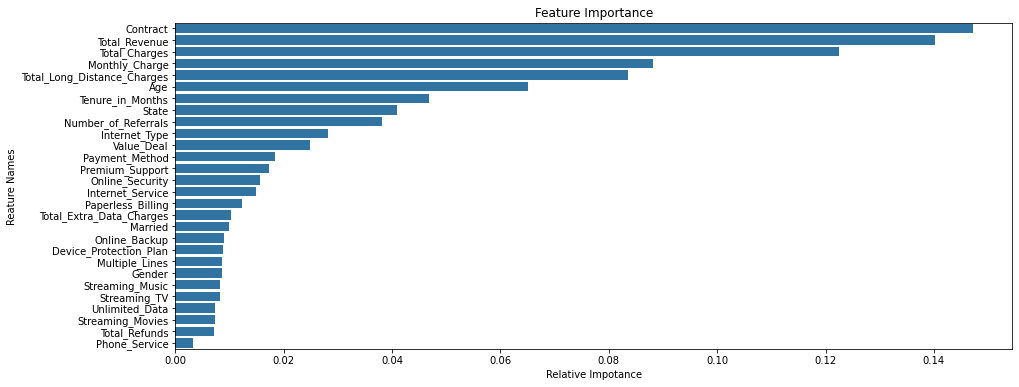

In [76]:
#plot the feature importance
plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices],y=x.columns[indices])
plt.title("Feature Importance")
plt.xlabel('Relative Impotance')
plt.ylabel('Reature Names')
plt.show()

## Use Model for Prediction on New Data

In [85]:
# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_csv('prediction_data.csv')
new_data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910160,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [86]:
# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()
original_data.head(2)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.0,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.0,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices


In [87]:
# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']
customer_ids

0       11098-MAD
1       11114-PUN
2       11167-WES
3       11179-MAH
4       11180-TAM
          ...    
6002    99898-MAH
6003    99912-WES
6004    99942-KER
6005    99942-TEL
6006    99962-AND
Name: Customer_ID, Length: 6007, dtype: object

In [88]:
# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)
new_data.head(2)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,Yes,...,Yes,Two Year,No,Bank Withdrawal,95.099998,6683.399902,0.0,0,631.719971,7315.120117
1,Male,51,No,Punjab,5,9,Deal 5,Yes,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,49.150002,169.050003,0.0,10,122.370003,301.420013


In [91]:
# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)
new_predictions


array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [92]:
# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions


In [93]:
# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]


In [95]:
# Save the results
original_data.to_csv("prediction_data.csv", index=False)
